Original BGR Image:


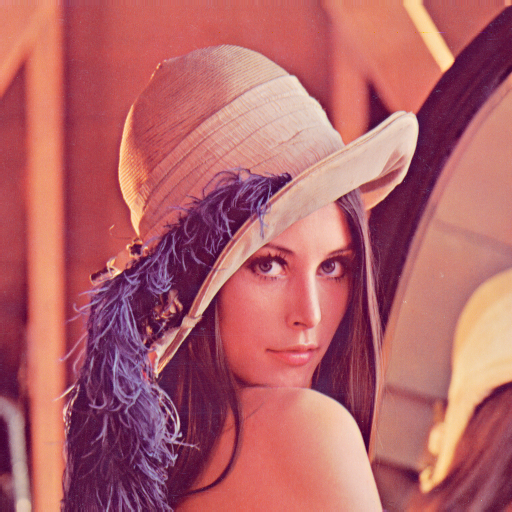

Image Size: 512x512, Channels: 3
Total Number of Pixels: 262144
RGB Image:


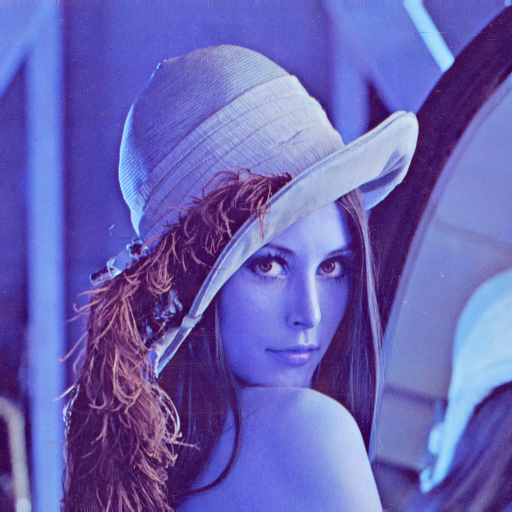

Grayscale Image:


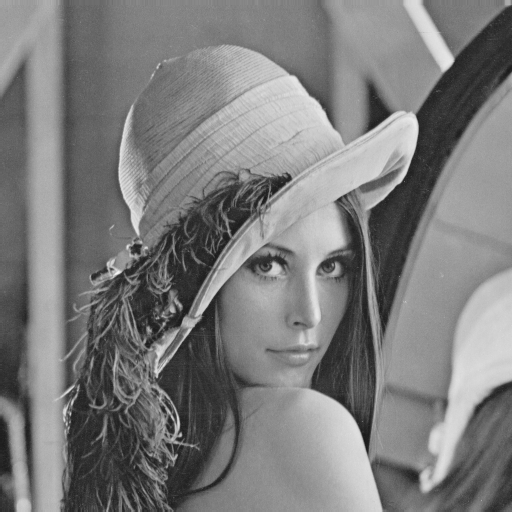

Binary Image:


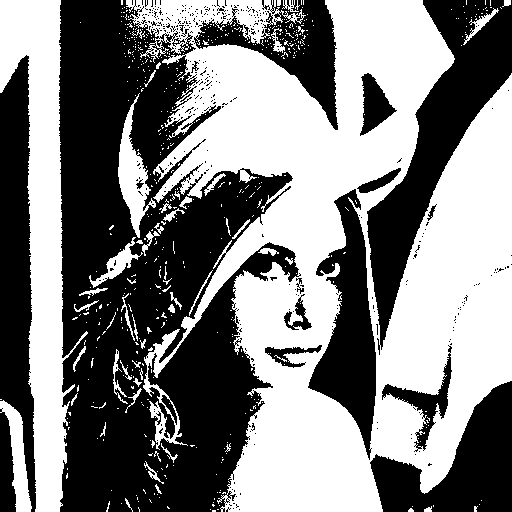

Black Pixel Count: 130547
Size of Image: 512x512


In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# 1. Read the image
image_bgr = cv2.imread('Lena_Image.png')  # Replace 'image.jpg' with your image file path

# 2. Display the original BGR image
print("Original BGR Image:")
cv2_imshow(image_bgr)

# 3. Extract the image size
height, width, channels = image_bgr.shape
print(f"Image Size: {height}x{width}, Channels: {channels}")

# 4. Calculate the number of pixels
num_pixels = height * width
print(f"Total Number of Pixels: {num_pixels}")

# 5. Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
cv2.imwrite('image_rgb.jpg', cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))  # Save the RGB image
print("RGB Image:")
cv2_imshow(image_rgb)

# 6. Convert RGB to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite('image_gray.jpg', image_gray)  # Save the Grayscale image
print("Grayscale Image:")
cv2_imshow(image_gray)

# 7. Convert Grayscale to Binary Image using Threshold
_, image_binary = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY)
cv2.imwrite('image_binary.jpg', image_binary)  # Save the Binary image
print("Binary Image:")
cv2_imshow(image_binary)

# Count the area of black pixels
black_pixel_count = np.sum(image_binary == 0)
print(f"Black Pixel Count: {black_pixel_count}")
print(f"Size of Image: {height}x{width}")


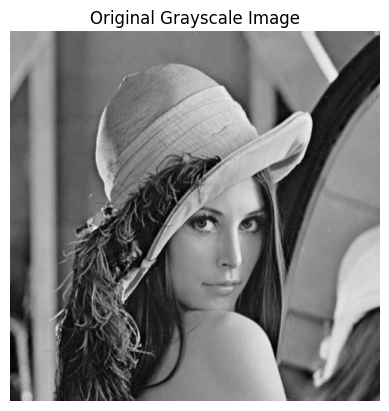

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import prewitt, sobel
from skimage import io, img_as_ubyte

# Read the input image (grayscale)
image = cv2.imread('Lena_Image.png', 0)  # Load the image in grayscale mode
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


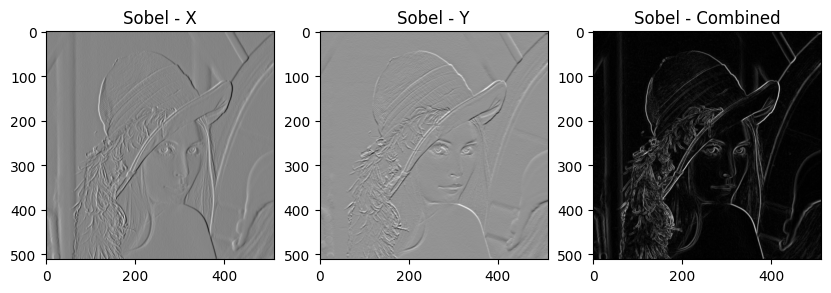

In [11]:
# Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # X-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Y-direction
sobel_combined = cv2.magnitude(sobel_x, sobel_y)       # Combine X and Y

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title("Sobel - X")
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title("Sobel - Y")
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title("Sobel - Combined")
plt.show()


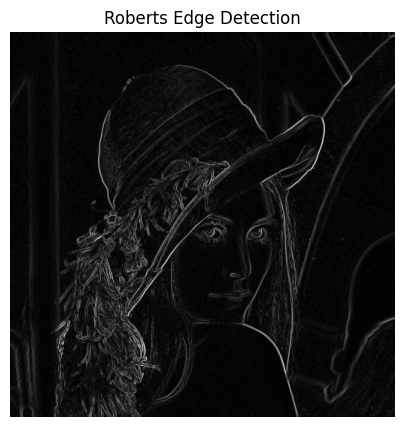

In [13]:
# Roberts Edge Detection (Using skimage)
from skimage.filters import roberts

roberts_edges = roberts(image)

plt.figure(figsize=(5, 5))
plt.imshow(roberts_edges, cmap='gray')
plt.title("Roberts Edge Detection")
plt.axis('off')
plt.show()


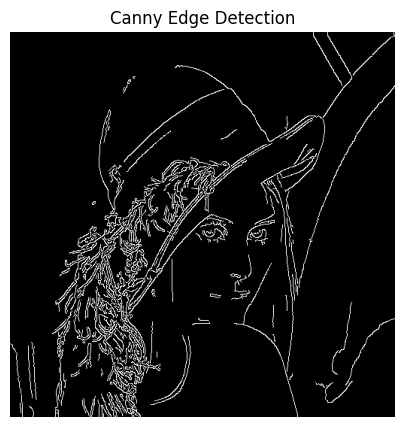

In [14]:
# Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)

plt.figure(figsize=(5, 5))
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


**Image Segmentation**

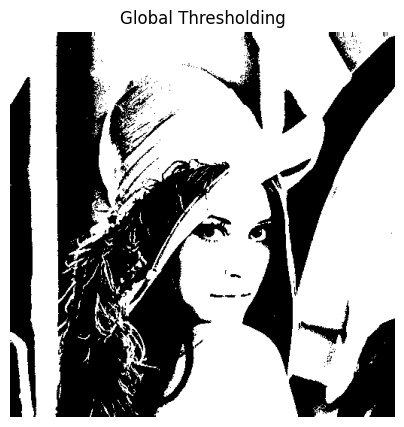

In [15]:
# Global Thresholding
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5, 5))
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.axis('off')
plt.show()


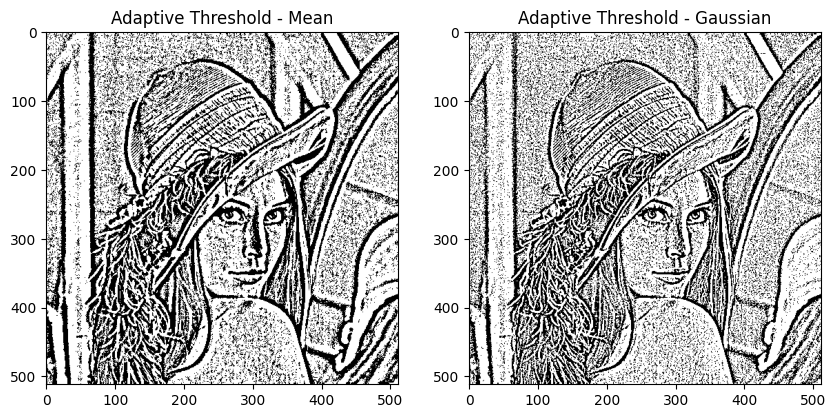

In [17]:
# Adaptive Thresholding
adaptive_thresh_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(adaptive_thresh_mean, cmap='gray'), plt.title("Adaptive Threshold - Mean")
plt.subplot(1, 2, 2), plt.imshow(adaptive_thresh_gaussian, cmap='gray'), plt.title("Adaptive Threshold - Gaussian")
plt.show()


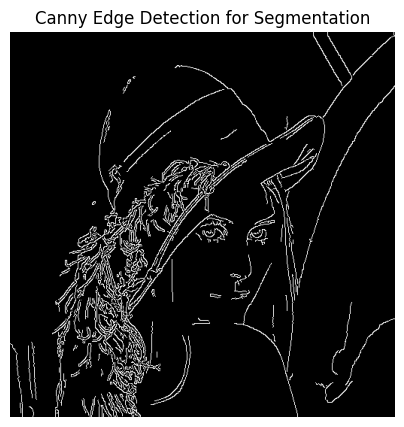

In [18]:
# Segmentation using Canny Edge Detection
plt.figure(figsize=(5, 5))
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection for Segmentation")
plt.axis('off')
plt.show()


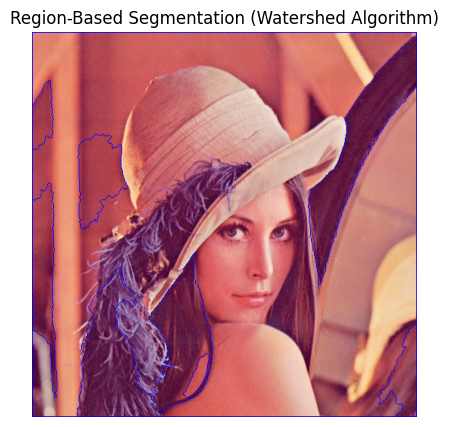

In [21]:
# Region-Based Segmentation (Watershed Algorithm)
image_color = cv2.imread('Lena_Image.png')  # Read original image in color

# Convert to grayscale and apply threshold
_, binary_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Identify sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Identify sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Mark unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]  # Mark boundaries in red

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Region-Based Segmentation (Watershed Algorithm)")
plt.axis('off')
plt.show()
